In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [18]:
df = pd.read_csv('/Users/aditirajesh/Desktop/program_files/python/ml_models/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [20]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [21]:
x = df.drop(columns=['Sex'])

In [22]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [23]:
pca = PCA()
x_pca = pca.fit_transform(x_sc)

In [24]:
best_k = -1
best_silhouette = -1

In [25]:
for k in range(2,11):
    k_means = KMeans(n_clusters=k,random_state=42)
    k_means.fit(x_pca)
    labels = k_means.labels_
    silhouette_avg = silhouette_score(x_pca,labels)

    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

In [26]:
kmeans_b = KMeans(n_clusters=best_k,random_state=42)
kmeans_b.fit(x_pca)
best_labels = kmeans_b.labels_

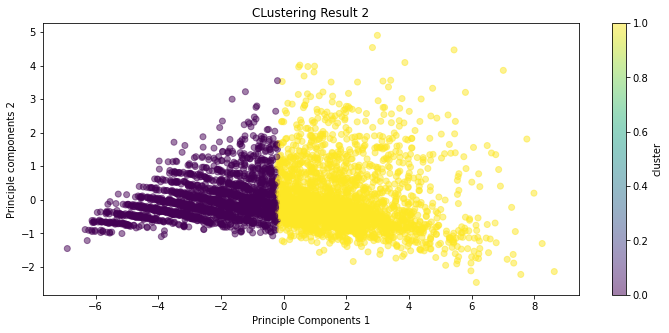

In [27]:
plt.figure(figsize=(12,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=best_labels,cmap='viridis',alpha=0.5)
plt.title(f"CLustering Result {best_k}")
plt.xlabel("Principle Components 1")
plt.ylabel("Principle components 2")
plt.colorbar(label='cluster')
plt.show()